In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from scipy import signal

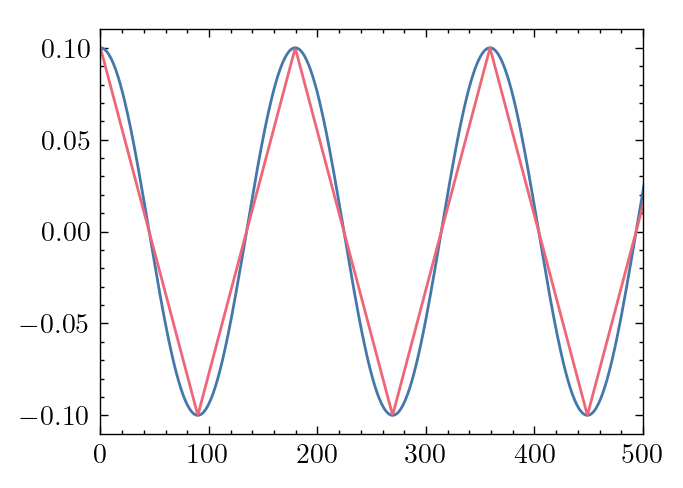

In [130]:
amplitude   = 0.1
freq        = 3.5
time_step   = 1e-10
N_periods   = 50
N_voltages  = int(N_periods*np.pi/(freq*1e8*time_step))
time_steps  = time_step*np.arange(N_voltages)
x_vals      = amplitude*np.cos(freq*time_steps*1e8)
y_target    = amplitude*signal.sawtooth(freq*time_steps*1e8-np.pi, 0.5)
y           = (y_target - np.mean(y_target))/np.std(y_target)

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.plot(x_vals)
    ax.plot(y_target)
    ax.set_xlim(0,500)

In [131]:
folder  = "../data/sine_to_triangle/"
N_max   = 6
N_vals  = N_max-1
data    = pd.DataFrame([np.loadtxt(f"{folder}ypred_{i}.csv") for i in range(1,N_max)]).T
data    = data.replace(0, np.nan).dropna(ignore_index=True)
data

,0,1,2,3,4
0,2.432994,0.735895,-2.351233,2.667269,1.861248
1,2.444736,1.043304,-2.271508,2.727504,1.867640
2,2.416788,1.133144,-2.165949,2.721270,1.853831
3,2.442048,1.187977,-2.067868,2.698592,1.849756
4,2.428292,1.236849,-1.961784,2.623710,1.856395
...,...,...,...,...,...
3987,1.186161,1.524237,1.279356,1.150930,1.467918
3988,1.231081,1.517966,1.220491,1.200874,1.512333
3989,1.202784,1.305631,1.216749,1.278359,1.505648
3990,1.210786,1.258705,1.235653,1.204213,1.445845


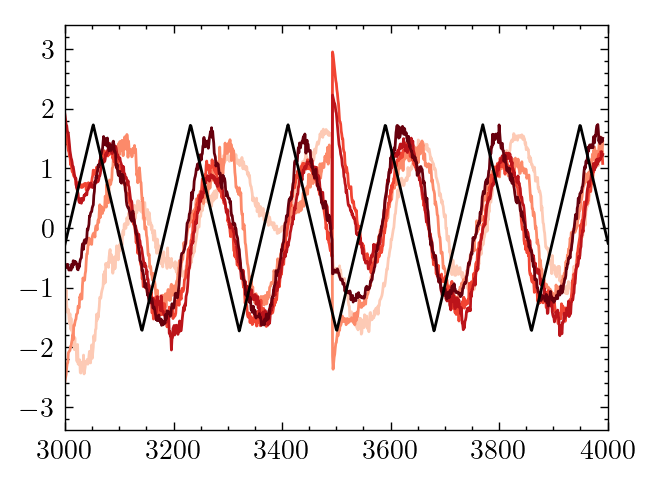

In [ ]:
c_map = plt.get_cmap('Reds')

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    for i, col in enumerate(data.columns):
        ax.plot(data[col], c=c_map((i+1)/N_vals))

    ax.plot(y, c='black')
    ax.set_xlim(3000,4000)